<a href="https://colab.research.google.com/github/robertoarturomc/Visualizacion/blob/main/11_Mejores_Visualizaciones_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 11. Mejores Visualizaciones II
## Teoría del Color
Como profesional de datos que buscamos crear una visualización efectiva, es necesario tener las nociones básicas de la teoría del color y los efectos que pueden tener en nuestras visualizaciones, especialmente si no tenemos una formación formal en diseño.
‍
Según los neurocientíficos del MIT, las imágenes se procesan en tan solo 13 milisegundos. 

Una paleta de colores cuidadosamente seleccionada ayuda a aprovechar los poderes de [Procesamiento preatentivo](https://github.com/robertoarturomc/Visualizacion/blob/main/2_Principios_de_Dise%C3%B1o_de_Informacion.ipynb) (pre-attentive processing) del cerebro humano, lo que hace que las ideas sean más claras y fáciles de encontrar. Una paleta de colores mal elegida oscurece la información que nuestr@s usuari@s necesitan comprender y hace que la visualización sea menos efectiva.

(Por cierto, para encontrar la documentación sobre formatos de colores usables en Matplotlib consulta [este enlace](https://matplotlib.org/stable/tutorials/colors/colors.html) )

## Anatomía de los Colores

1. **Hue** (tono): lo que normalmente conocemos como "colores distintos": rojo, verde, naranja, azul, etc.

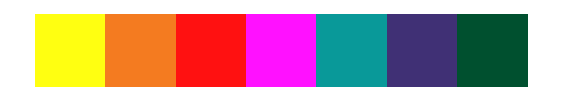

In [80]:
n=7
plt.figure(figsize=(n,1))
plt.bar(np.arange(n), [1]*n, width=1, 
        color=["#FFFF11", "#F47B20","#FF1111", "#FF11FF", "#099999", "#403075", "#00502F"])
plt.axis('off')
plt.show()

2. **Saturación:** se refiere al brillo de un color en relación con el área que ocupa. Demasiada saturación puede ser abrumador y dificultar la búsqueda de otros elementos visuales.

> Saturación alta = colores vibrantes.

> Saturación baja = colores más apagados y blancos.

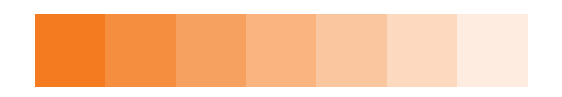

In [81]:
up = 255
red = np.arange(244, up, (up-244) / n) / up
green = np.arange(123, up, (up-123) / n) / up
blue = np.arange(32, up, (up-32) / n) / up

satur = list(zip(red, green, blue))

plt.figure(figsize=(n,1))
plt.bar(np.arange(n), [1]*n, width=1, 
        color=satur)
plt.axis('off')
plt.show()

3. **Luminosidad:** está estrechamente relacionada con la saturación, pero utiliza grados de blanco y negro en lugar del brillo de un color. "¿Qué tanta luz tiene un color?"

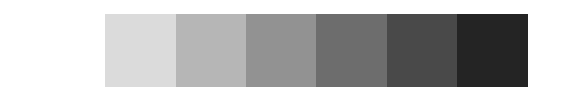

In [85]:
red = np.arange(1, 0, -1 / n)
green = np.arange(1, 0, -1 / n)
blue = np.arange(1, 0, -1 / n)

lumi = list(zip(red, green, blue))

plt.figure(figsize=(n,1))
plt.bar(np.arange(n), [1]*n, width=1, 
        color=lumi)
plt.axis('off')
plt.show()

In [210]:
plt.style.use('ggplot')

## Armonía del color

Es importante que nuestra combinación de colores sea estética y agradable a la vista. Dependiendo de la historia que queramos contar, hay distintas ideas de colores que se pueden escoger.

Pero antes, es importante que conozcas la **Rueda de Color/Cromática**. Es una representación visual bastante común sobre la diversidad de colores.

![ruedaColor](https://img.freepik.com/vector-premium/rueda-color-o-circulo-color-doce-colores-que-muestra-colores-primarios_231786-4443.jpg?w=2000)

Ahora sí, ¿Cómo escojo que colores usar?


![colorEleccion](https://global-uploads.webflow.com/5e2a5ec7be4a746f7a1fcd6d/60184a4d11f8869f7885c105_Color-Harmony_RevUnit.png)

* Una paleta **monocromática** es mejor cuando los datos son secuenciales o varían en grado en lugar de tipo.

In [128]:
dow = sns.load_dataset("dowjones")
dow["year"] = dow.Date.apply(lambda x: x.year)
dow["month"] = dow.Date.apply(lambda x: x.month)

dow.head()

,Date,Price,year,month
0,1914-12-01,55.00,1914,12
1,1915-01-01,56.55,1915,1
2,1915-02-01,56.00,1915,2
3,1915-03-01,58.30,1915,3
4,1915-04-01,66.45,1915,4


Por ejemplo; supongamos que quiero detectar si hay algún patrón estacionario en la data; es decir, si en algunos meses el precio tiende a subir, y en otros a bajar, independientemente del año. 

Como en este caso los datos no varían en tipo (pertenecen a la misma categoría), y no es necesario hacer una distinción, lo mejor es usar una paleta monocromática; usando siempre el mismo color para evitar distracciones innecesarias. 

Si acaso, podría modificar el nivel de saturación pra representar años distintos.

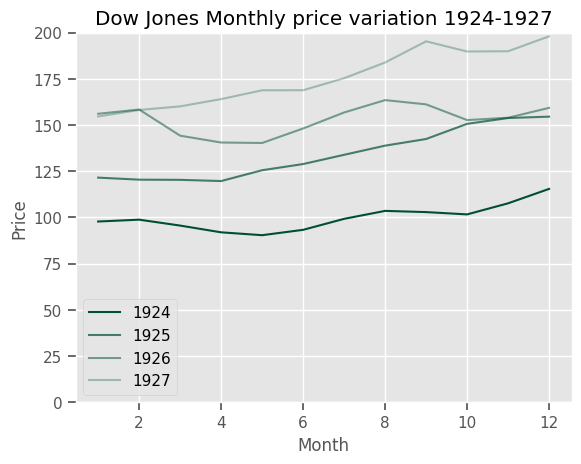

In [211]:
verde_udlap = np.array([0, 80, 47]) / 255

init_year = 1924
plt.plot(dow.loc[dow.year==init_year + 0, "month"],
         dow.loc[dow.year==init_year + 0, "Price"], label=init_year + 0, color=verde_udlap)
plt.plot(dow.loc[dow.year==init_year + 1, "month"],
         dow.loc[dow.year==init_year + 1, "Price"], label=init_year + 1, color=verde_udlap, alpha=0.7)
plt.plot(dow.loc[dow.year==init_year + 2, "month"],
         dow.loc[dow.year==init_year + 2, "Price"], label=init_year + 2, color=verde_udlap, alpha=0.5)
plt.plot(dow.loc[dow.year==init_year + 3, "month"],
         dow.loc[dow.year==init_year + 3, "Price"], label=init_year + 3, color=verde_udlap, alpha=0.3)

plt.ylim([0, 200])
plt.title("Dow Jones Monthly price variation " + str(init_year) + "-" + str(init_year+3))
plt.xlabel("Month")
plt.ylabel("Price")
plt.legend()
plt.show()

* Las parejas **análogas**, colores que se ubican uno al lado del otro en la rueda de colores, brindan una alternativa más variada,

Si bien aún permanecen separados entre sí visualmente, crean menos contraste que los colores con tonos diferentes, lo que da la percepción de que los elementos están relacionados pero son diferentes.

Esto puede ser útil para visualizar categorías diferentes pero todas igual de importantes.

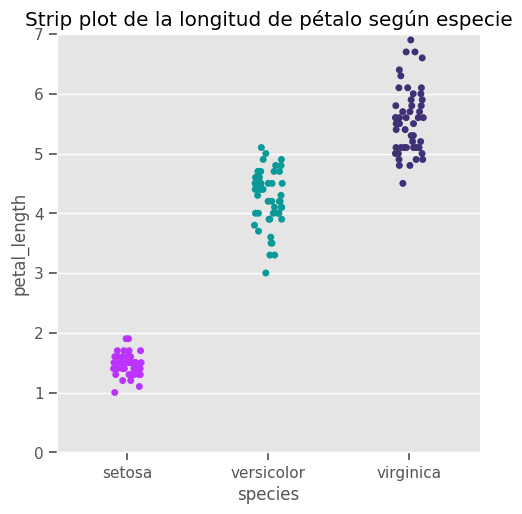

In [212]:
iris = sns.load_dataset("iris")

sns.catplot(data=iris, x="species", y="petal_length", kind="strip", hue="species", palette=["#BB33FF", "#099999", "#403075"])
plt.title("Strip plot de la longitud de pétalo según especie")
plt.ylim([0, 7])

plt.show()
     

Nota: es importante que los distintos colores tengan el mismo nivel de saturación y e luminosidad, para que sean agradables a la vista.

Por cierto, `seaborn` tiene varias paletas análogas pre-programadas muy buenas.

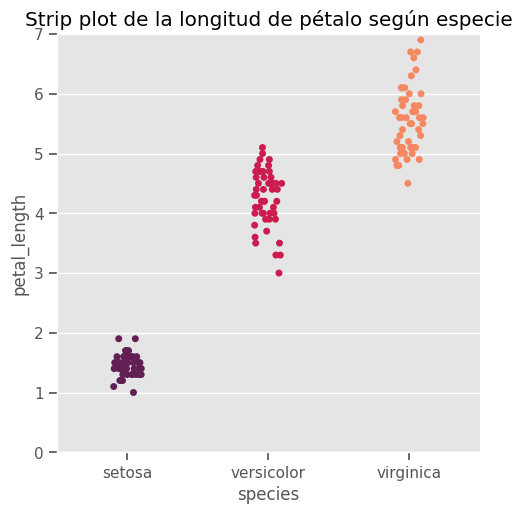

In [213]:
iris = sns.load_dataset("iris")

sns.catplot(data=iris, x="species", y="petal_length", kind="strip", hue="species", palette="rocket")
plt.title("Strip plot de la longitud de pétalo según especie")
plt.ylim([0, 7])

plt.show()

* Las tonalidades **complementarias** representan contraste. Hacer uso de este tipo de emparejamientos es un atajo fácil para dar la percepción de que las cosas que representan son opuestas, o tienen distinta importancia. Por ejemplo, el impacto "positivo" y "negativo", ganancias frente a pérdidas, etc.

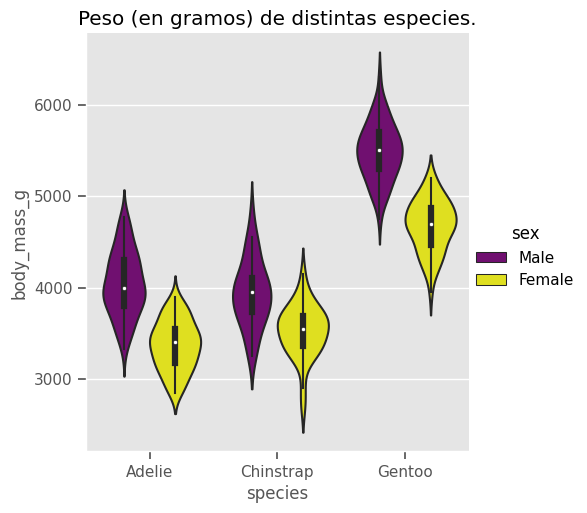

In [214]:
peng = sns.load_dataset("penguins")

sns.catplot(data=peng, x="species", y="body_mass_g", kind="violin", hue="sex", palette=["purple", "yellow"])
plt.title("Peso (en gramos) de distintas especies.")


plt.show()

En internet hay sitios buenísimos que te ayudan a conseguir combinaciones armoniosas de colores, además de proporcionarte los códigos de esos colores en distintos formatos (RGB, CMYK, Hexadecimal-Web). Un ejemplo es [Paletton](https://paletton.com/).

### Tips para escoger colores

1. Se constante.

> A los humanos no nos gusta el cambio. Si ya usaste morado para machos y amarillo para hembras en alguna gráfica, vuelve a repetir esos tonos para representar esas categorías. Si cambias, puede generar confusiones.

2. Investiga los colores institucionales.

> Investiga si existe un Manual de Identidad Gráfica. Es un buen detalle usar los colores que se relacionen con la institución/empresa/ONG con la que estés colaborando, y muchas veces, ya tienen una buena paleta d ecolores análogos y complementarios.

> En caso contrario, nota qué colores son más frecuentes en tu Powerpoint / archivo en el que estés trabajando y usa esos colores.

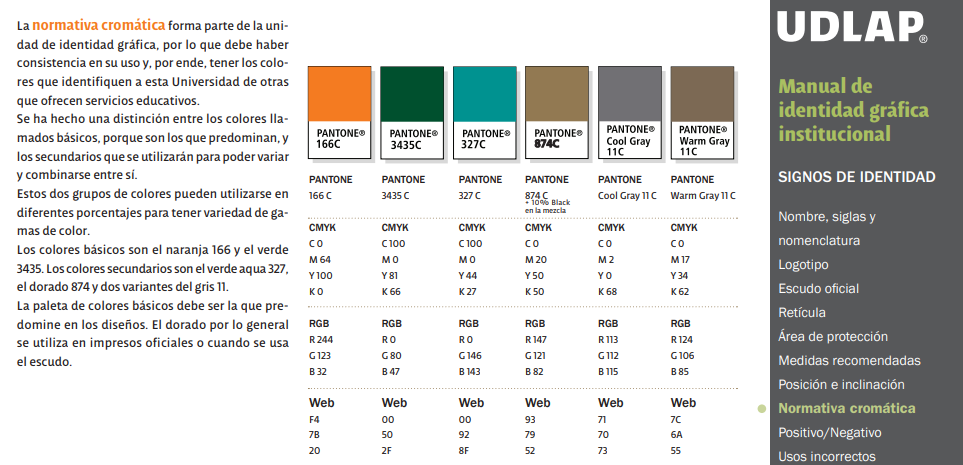

3. ¡No uses el color principal de tu Institución para representar algo negativo!

> Si acaso, usa el color secundario, el terciario, o algún otro.

4. Cuidado con el verde y el rojo

> Mucha gente los relaciona con algo positivo o negativo...como en un semáforo. Para no mandar un mensaje equivocado, a veces puede ser buena idea usar otros colores. (o al revés, usar verde /rojo a propósito, para mejorar el impacto de mi mensaje).

> Hablando de eso...

5. Cuidado con la gente daltónica.

> El daltonismo es una condición en donde la gente es incapaz de distinguir dos tonalidades distintas de colores. Algunas combinaciones, como el rojo y el verde, son relativamente comúnes de generar esta confusión, por lo que se recomienda no usarlas.



6. Escalas de colores y variables cuantitativas.

> Cuando se usa el color para mostrar cantidades, las diferencias en los valores se representan con mayor frecuencia mediante cambios en la saturación y/o la luminosidad.

> ¿Cuándo usar una escala monocromática y cuándo una divergente?

Si la variable cuantitativa tiene un valor mínimo de 0, es mejor usar una escala monocromática.

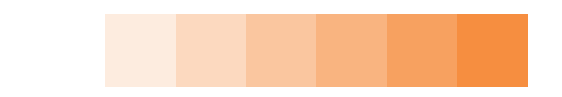

In [222]:


plt.figure(figsize=(n,1))
plt.bar(np.arange(n), [1]*n, width=1, 
        color=satur)
plt.axis('off')
plt.show()

Si la variable cuantitativa tiene valores negativos o positivos, o con un centro bien definido, es mejor usar una escala divergente.

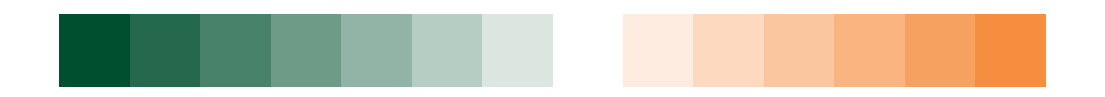

In [228]:
p = 255# (0, 80, 47)
red = np.arange(0, up, (up-0) / n) / up
green = np.arange(80, up, (up-80) / n) / up
blue = np.arange(47, up, (up-47) / n) / up

satur2 = list(zip(red, green, blue)) + satur

plt.figure(figsize=(14,1))
plt.bar(np.arange(14), [1]*14, width=1, 
        color=satur2)
plt.axis('off')
plt.show()